In [1]:
import numpy as np
import seaborn as sns
sns.set_theme('poster')
import matplotlib.pyplot as plt
import pandas as pd
pd.option_context('mode.use_inf_as_na', True)

from peakutils import indexes
from peakutils import baseline

from scipy.signal import savgol_filter
from scipy.signal import find_peaks as fp
from scipy.interpolate import lagrange

import os

In [2]:
datapath = './data/'
files = os.listdir(datapath)

txtfiles = []
for file in files:
    _,extension= os.path.splitext(file)
    if extension=='.txt':
        txtfiles.append(file)
txtfiles[:] = [txtfiles[-1]] + txtfiles[:-1]
txtfiles[2],txtfiles[3] = txtfiles[3],txtfiles[2]

meanings = ['22Na-Energy-Scale','137Cs-Energy-Scale']+[fr'${i}\degree$ data' for i in np.linspace(120,20,6)]
datas = [pd.read_csv(datapath+file, sep='\t')['1'].values for file in txtfiles]
datas = pd.DataFrame(dict(zip(meanings,datas)))

## savgol_filter

<Axes: >

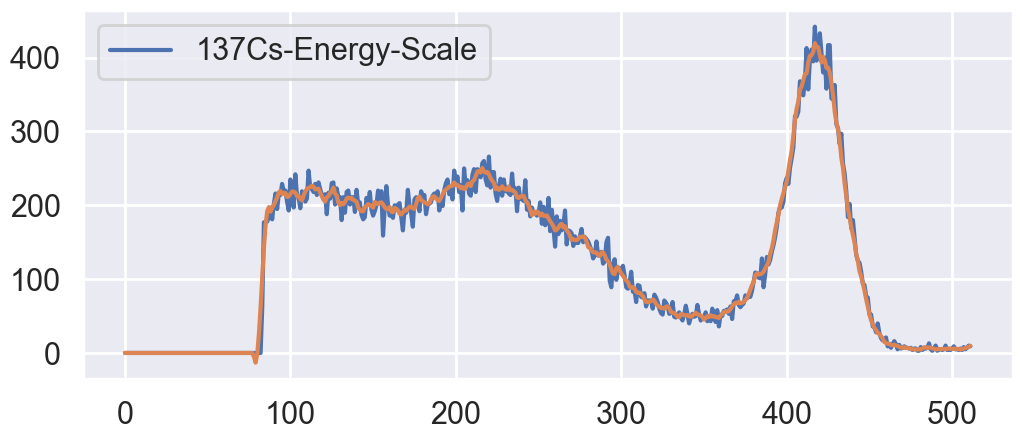

In [3]:
ax = datas.plot(y='137Cs-Energy-Scale')
fig = ax.get_figure()
fig.set_figwidth(12)
y_filter = savgol_filter(datas['137Cs-Energy-Scale'],
                         window_length=10,
                         polyorder=2)
sns.lineplot(y_filter,ax=ax)

## peak_find

#### indexes

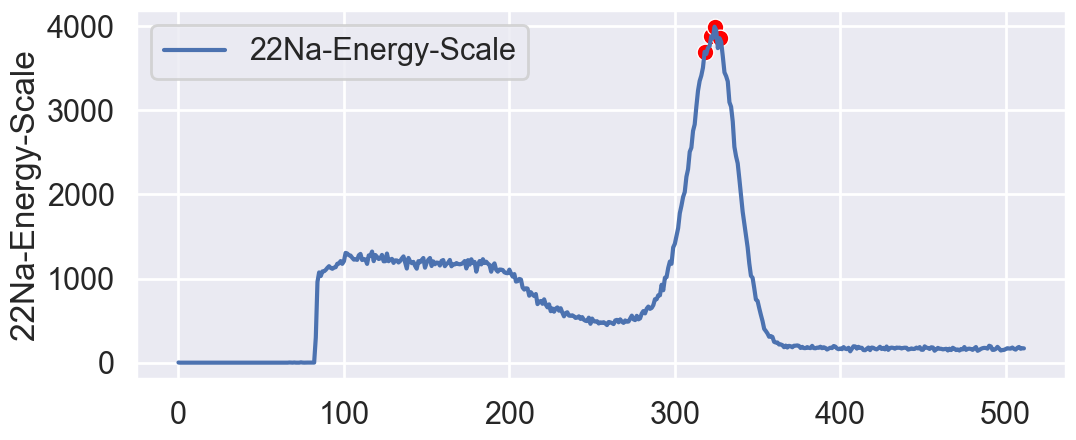

In [4]:
pl = indexes(datas['22Na-Energy-Scale'].values,
             min_dist=1,
             thres=0.4)
datas.plot(y='22Na-Energy-Scale')
sns.scatterplot(data=datas.iloc[pl],x=pl,y='22Na-Energy-Scale',color='red')
plt.gcf().set_figwidth(12)

#### sympy.signal.find_peak

'zx'

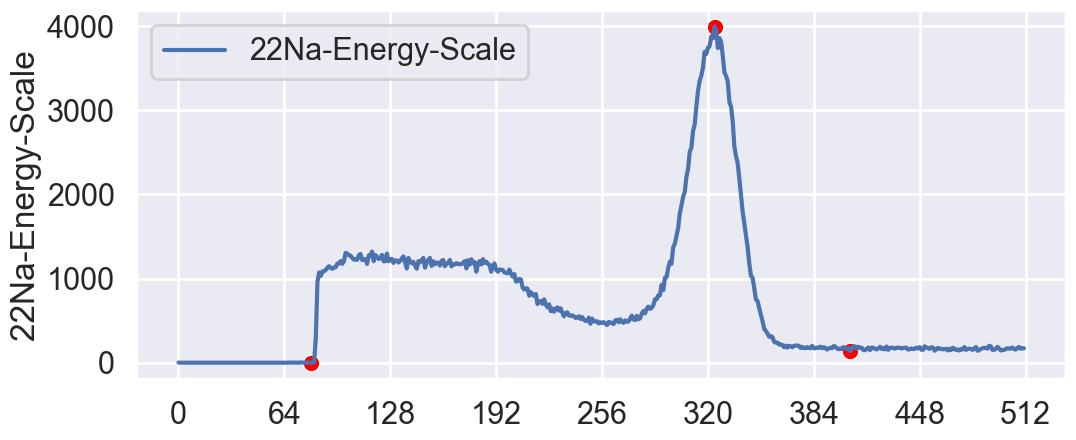

In [5]:
p2,info = fp(datas['22Na-Energy-Scale'],
          height=2000,
          distance=100,
          prominence=3000)
ax = datas.plot(y='22Na-Energy-Scale')
sns.scatterplot(data=datas.iloc[p2],x=p2,y='22Na-Energy-Scale',color='red',ax=ax)
sns.scatterplot(data=datas.iloc[info['left_bases']],x=info['left_bases'],y='22Na-Energy-Scale',color='red',ax=ax)
sns.scatterplot(data=datas.iloc[info['right_bases']],x=info['right_bases'],y='22Na-Energy-Scale',color='red',ax=ax)


ax.set_xticks(np.arange(0,513,64))
fig = ax.get_figure()
fig.set_figwidth(12)
# plt.xlim(200,400)
_

## Baseline Correction

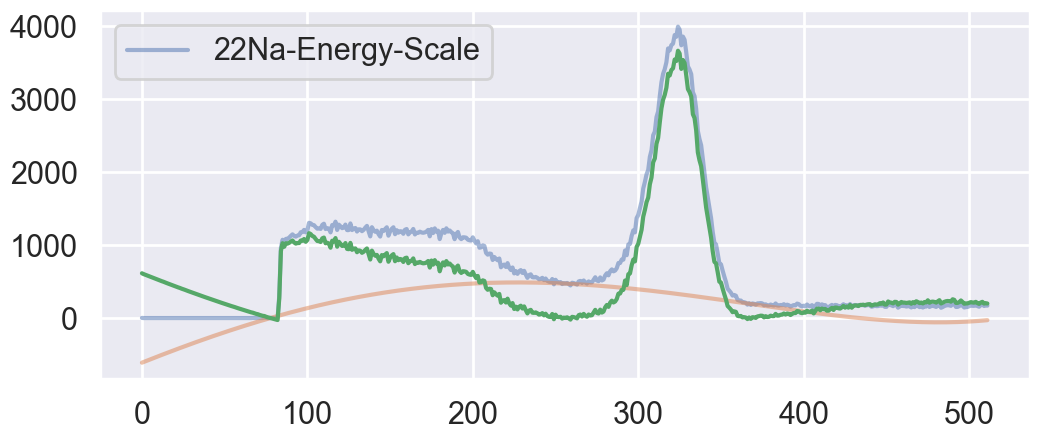

In [6]:
ax = datas.plot(y='22Na-Energy-Scale',alpha=0.5)
bl = baseline(datas['22Na-Energy-Scale'],
              deg=4)
new_data = datas['22Na-Energy-Scale'].values-bl
sns.lineplot(bl,ax=ax,alpha = 0.5)
sns.lineplot(new_data)
fig = ax.get_figure()
fig.set_figwidth(12)

## Peak Integration

126810.41636263643

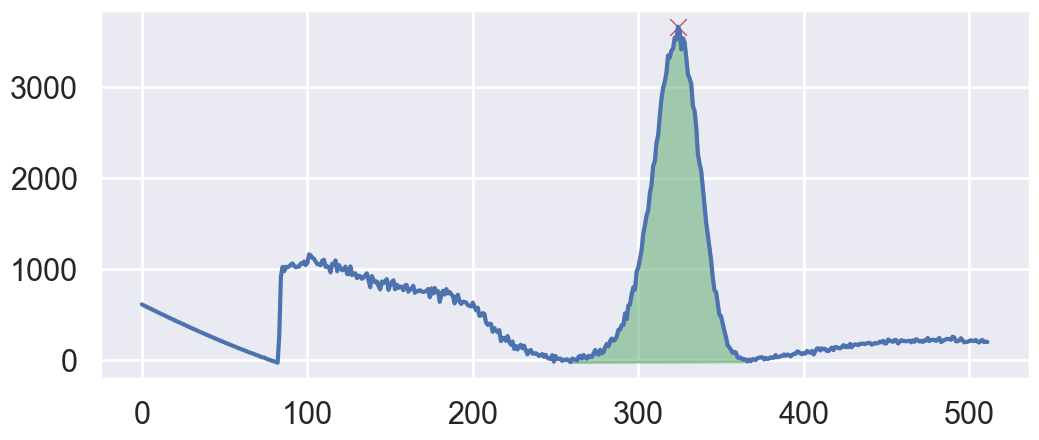

In [7]:
ax = sns.lineplot(new_data)

new_data=new_data[200:]
x_data=datas.index.values[200:]
indexes = np.arange(0,len(x_data),1)

# ax = sns.lineplot(x=x_data,y=new_data)
peaks,info = fp(new_data,prominence=3000,width=30,height=2000)
fig = ax.get_figure()
fig.set_figwidth(12)
sns.scatterplot(x=x_data[peaks],y=new_data[peaks],color='r',marker='x')
# sns.scatterplot(x=x_data[info['left_bases']],y=new_data[info['left_bases']],color='y')
# sns.scatterplot(x=x_data[info['right_bases']],y=new_data[info['right_bases']],color='y')
low_index = info['left_bases'][0]
high_index = info['right_bases'][0]
inte_bottom = lagrange([x_data[info['left_bases']][0],x_data[info['right_bases']][0]],
                       [new_data[info['left_bases']][0],new_data[info['right_bases']][0]])
ax.fill_between(x_data[low_index:high_index],
                inte_bottom(x_data[low_index:high_index]),
                new_data[low_index:high_index],
                color='g',alpha=0.5)

area = np.trapz(new_data[low_index:high_index])
area


126810.41636263643

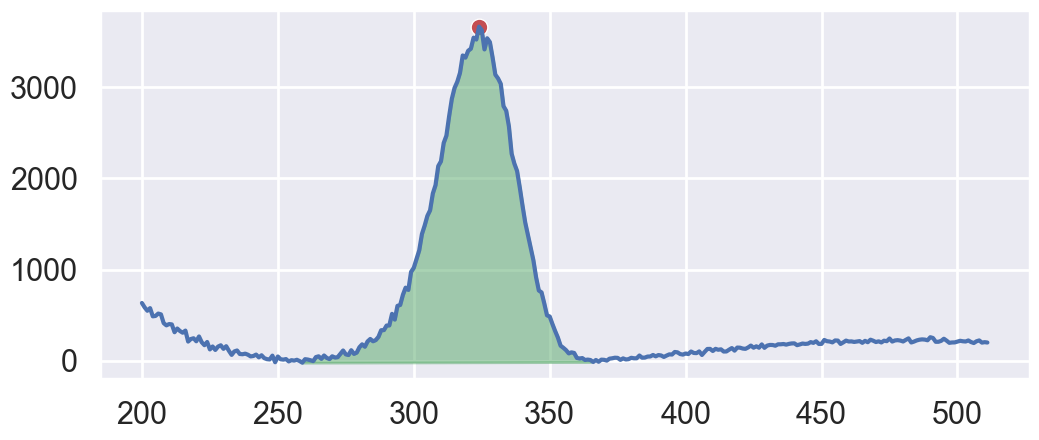

In [8]:
ax = sns.lineplot(x=x_data,y=new_data)
peaks,info = fp(new_data,prominence=3000,width=30,height=2000)
fig = ax.get_figure()
fig.set_figwidth(12)
sns.scatterplot(x=x_data[peaks],y=new_data[peaks],color='r')
# sns.scatterplot(x=x_data[info['left_bases']],y=new_data[info['left_bases']],color='y')
# sns.scatterplot(x=x_data[info['right_bases']],y=new_data[info['right_bases']],color='y')
low_index = info['left_bases'][0]
high_index = info['right_bases'][0]
inte_bottom = lagrange([x_data[info['left_bases']][0],x_data[info['right_bases']][0]],
                       [new_data[info['left_bases']][0],new_data[info['right_bases']][0]])
ax.fill_between(x_data[low_index:high_index],
                inte_bottom(x_data[low_index:high_index]),
                new_data[low_index:high_index],
                color='g',alpha=0.5)

area = np.trapz(new_data[low_index:high_index])
area


In [9]:
inte_bottom(x_data[low_index:high_index])

array([-21.55130626, -21.48305771, -21.41480917, -21.34656062,
       -21.27831207, -21.21006352, -21.14181497, -21.07356643,
       -21.00531788, -20.93706933, -20.86882078, -20.80057223,
       -20.73232369, -20.66407514, -20.59582659, -20.52757804,
       -20.45932949, -20.39108095, -20.3228324 , -20.25458385,
       -20.1863353 , -20.11808675, -20.04983821, -19.98158966,
       -19.91334111, -19.84509256, -19.77684401, -19.70859547,
       -19.64034692, -19.57209837, -19.50384982, -19.43560127,
       -19.36735273, -19.29910418, -19.23085563, -19.16260708,
       -19.09435853, -19.02610999, -18.95786144, -18.88961289,
       -18.82136434, -18.75311579, -18.68486725, -18.6166187 ,
       -18.54837015, -18.4801216 , -18.41187305, -18.34362451,
       -18.27537596, -18.20712741, -18.13887886, -18.07063031,
       -18.00238177, -17.93413322, -17.86588467, -17.79763612,
       -17.72938757, -17.66113903, -17.59289048, -17.52464193,
       -17.45639338, -17.38814483, -17.31989629, -17.25

In [10]:
new_data[low_index]

-21.551306262443745

In [11]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

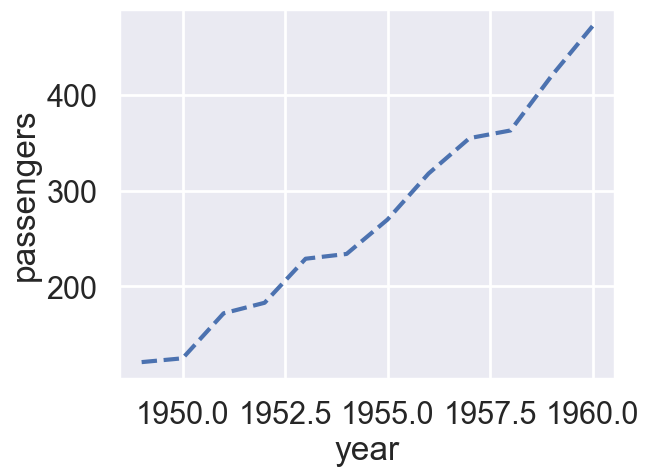

In [16]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers",linestyle='dashed')